In [2]:
from python.analysis import Master, Plots, vector
from apps.prod4a_merge_study import EventSelection, ShowerMergeQuantities

import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

from types import SimpleNamespace
from rich import print
from tabulate import tabulate

events = Master.Data("work/ROOTFiles/Prod4a_6GeV_BeamSim_00.root", True)
events.Filter([events.recoParticles.cnnScore != -999])

start_showers = EventSelection(events)

mask = np.logical_or(events.recoParticles.startPos.x != -999, events.recoParticles.momentum.x != -999)
events.Filter([mask])
start_showers = [start_showers[i][mask] for i in range(2)]

#* get boolean mask of PFP's to merge
to_merge = np.logical_not(np.logical_or(*start_showers))

#* class to calculate quantities
q = ShowerMergeQuantities(events, to_merge)

#* get boolean mask of PFP's which are actual fragments of the starting showers
start_shower_ID = events.trueParticlesBT.number[np.logical_or(*start_showers)]
to_merge_ID = events.trueParticlesBT.number[to_merge]
signal = [start_shower_ID[:, i] == to_merge_ID for i in range(2)] # signal are the PFOs which is a fragment of the ith starting shower

#* define signal and background
signal_all = np.logical_or(*signal)
signal_all = signal_all[q.null]
background = np.logical_not(signal_all) # background is all other PFOs unrelated to the pi0 decay
signal = [signal[i][q.null] for i in range(2)]



/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to run.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to subRun.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to eventNum.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to _Tr

'BeamMCFilter' executed in 11.7661s
number of dalitz decays: 222
'ApplyBeamFilter' executed in 9.0557s
\begin{tabular}{lllll}
\hline
 event selection                   & type        & number of events & percentage of events removed & percentage of events remaining \\
 no selection                      & -           & 100222           & -                            &                                \\
 beam -\ensuremath{>} pi0 + X                   & truth       & 27341            & 72.71956257109217            & 100                            \\
 pi+ beam                          & backtracked & 20204            & 26.10365385318752            & 73.89634614681248              \\
 diphoton decay                    & truth       & 19982            & 1.0987923183528014           & 73.0843787718079               \\
 beam particle                     & reco        & 10205            & 48.929036132519265           & 37.324896675322776             \\
 nPFP \ensuremath{>} 1                      

/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:50: UserWarning: Couldn't apply filters to _RecoParticleData__beamVertex.
  warnings.warn(f"Couldn't apply filters to {var}.")


1362884

2725768

1362884

1362884

╒════════╤═════════════════════╤═════════════════════════╤═════════╤══════════╕
│    cut │   signal efficiency │   background efficiency │   delta │   purity │
╞════════╪═════════════════════╪═════════════════════════╪═════════╪══════════╡
│ 0.0000 │              1.0000 │                  1.0000 │  0.0000 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0100 │              0.9980 │                  0.9977 │  0.0003 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0200 │              0.9963 │                  0.9957 │  0.0006 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0300 │              0.9944 │                  0.9937 │  0.0007 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0400 │              0.9930 │                  0.9912 │  0.0018 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0500 │              0.9913 │                  0.9885 │  0.0028 │   0.0104 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0600 │              0.9895 │                  0.9851 │  0.0044 │   0.0105 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0700 │              0.9877 │                  0.9810 │  0.0067 │   0.0105 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0800 │              0.9860 │                  0.9761 │  0.0099 │   0.0105 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.0900 │              0.9838 │                  0.9705 │  0.0133 │   0.0106 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1000 │              0.9818 │                  0.9638 │  0.0179 │   0.0106 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1100 │              0.9801 │                  0.9564 │  0.0237 │   0.0107 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1200 │              0.9780 │                  0.9484 │  0.0296 │   0.0107 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1300 │              0.9760 │                  0.9403 │  0.0357 │   0.0108 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1400 │              0.9744 │                  0.9318 │  0.0426 │   0.0109 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1500 │              0.9724 │                  0.9234 │  0.0489 │   0.0110 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1600 │              0.9701 │                  0.9154 │  0.0547 │   0.0110 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1700 │              0.9681 │                  0.9076 │  0.0605 │   0.0111 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1800 │              0.9667 │                  0.9001 │  0.0666 │   0.0112 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.1900 │              0.9643 │                  0.8928 │  0.0716 │   0.0112 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.2000 │              0.9613 │                  0.8858 │  0.0755 │   0.0113 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.2100 │              0.9593 │                  0.8791 │  0.0803 │   0.0114 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.2200 │              0.9578 │                  0.8726 │  0.0852 │   0.0114 │
├────────┼─────────────────────┼─────────────────────────┼─────────┼──────────┤
│ 0.2300 │              0.9562 │                  0.8666 │  0.0896 │   0.0115 │


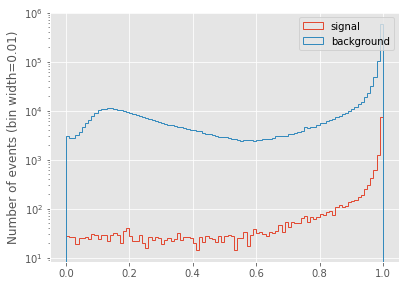

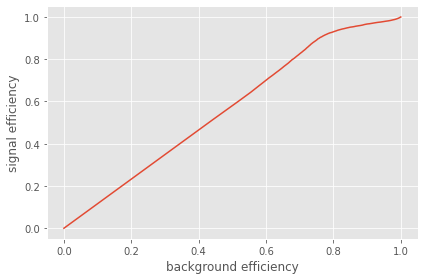

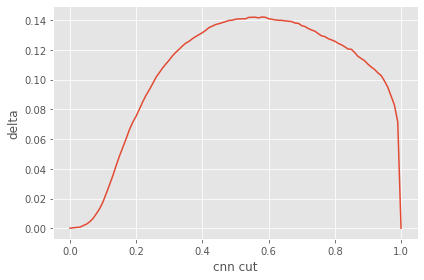

In [17]:
plt.style.use('ggplot')
plt.rcParams.update({'patch.linewidth': 1})
print(ak.count(events.recoParticles.number[q.null]))
print(ak.count(signal))
print(ak.count(signal_all))

cnn = events.recoParticles.cnnScore[q.null]
print(ak.count(cnn))

Plots.PlotHistComparison([
    ak.ravel(cnn[signal_all]), 
    ak.ravel(cnn[background])],
    y_scale="log", labels=["signal", "background"], density=False)

ts = ak.count(signal_all[signal_all])
tb = ak.count(background[background])
cut = np.linspace(0, 1, 101)

out = {"cut": cut, "signal efficiency": [], "background efficiency": [], "delta": [], "purity": []}

def count(mask):
    return ak.count(mask[mask])

for c in cut:
    mask = cnn > c
    s = count(mask[signal_all])
    b = count(mask[background])
    out["signal efficiency"].append(s/ts)
    out["background efficiency"].append(b/tb)
    out["delta"].append(s/ts - b/tb)
    out["purity"].append(s/(s+b) if s+b > 0 else -1)
    #print(f"cut: {c:.2f} | signal: {ak.count(s[s])/ts:.2f} | background: {ak.count(b[b])/tb:.2f}")

Plots.Plot(out["background efficiency"], out["signal efficiency"], "background efficiency", "signal efficiency")
print(tabulate(out, headers=out.keys(), tablefmt="fancy_grid", floatfmt=".4f"))
Plots.Plot(out["cut"], out["delta"], xlabel="cnn cut", ylabel="delta")